# Iris Dataset Overview

## Features:

- **Sepal Length**: Length of the sepal (in centimeters).
- **Sepal Width**: Width of the sepal (in centimeters).
- **Petal Length**: Length of the petal (in centimeters).
- **Petal Width**: Width of the petal (in centimeters).

## Target:

The target variable represents the species of iris flowers, categorized into three classes:

- **Setosa**
- **Versicolor**
- **Virginica**

## Dataset Information:

- **Feature Names**: Sepal Length, Sepal Width, Petal Length, Petal Width.
- **Target Names**: Setosa, Versicolor, Virginica.
- **Data Shape**: (150, 4) - The dataset contains 150 samples and 4 features.
- **Target Shape**: (150,) - The target variable contains 150 labels corresponding to the species of iris flowers.


In [1]:
from sklearn.datasets import load_iris

# Memuat dataset iris
iris = load_iris()

# Menampilkan informasi dataset
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("Data shape:", iris.data.shape)
print("Target shape:", iris.target.shape)


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)
Target shape: (150,)


In [4]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# K-Means Clustering Analysis

## Introduction
This markdown cell describes the analysis of K-Means clustering performed on a dataset using various distance metrics and dimensionality reduction techniques.

## Code Explanation
The provided code performs K-Means clustering on a dataset using the following steps:

1. **Importing Libraries**: The code imports necessary libraries including NumPy for numerical operations, scikit-learn for K-Means clustering, pairwise distance calculations, and PCA for dimensionality reduction.

2. **Clustering with K-Means**: The KMeans class from scikit-learn is initialized with 3 clusters and fitted to the dataset.

3. **Computing Distances**: Euclidean, Manhattan, and Cosine distances between data points and cluster centers are computed using the euclidean_distances, manhattan_distances, and cosine_distances functions.

4. **Dimensionality Reduction**: Principal Component Analysis (PCA) is used to reduce the dimensionality of the dataset to 2 dimensions.

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances
from sklearn.decomposition import PCA

# Perform clustering using the K-Means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Compute the distances between data points and cluster centers
euclidean_dist = euclidean_distances(X, centroids)
manhattan_dist = manhattan_distances(X, centroids)
cosine_dist = cosine_distances(X, centroids)

# Use PCA to reduce the dimensionality of the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Silhouette Score Calculation

## Introduction
The provided code calculates the silhouette score for K-Means clustering using three different distance metrics: Euclidean, Manhattan, and Cosine.

## Code Explanation
The code snippet performs the following steps:

1. **Importing Libraries**: The code imports the silhouette_score function from scikit-learn.metrics module. This function is used to compute the silhouette score, which quantifies the quality of clustering.

2. **Silhouette Score Calculation**: 
   - For K-Means clustering with Euclidean distance: The silhouette_avg_euclidean variable is assigned the silhouette score calculated using the 'euclidean' metric.
   - For K-Means clustering with Manhattan distance: The silhouette_avg_manhattan variable is assigned the silhouette score calculated using the 'manhattan' metric.
   - For K-Means clustering with Cosine distance: The silhouette_avg_cosine variable is assigned the silhouette score calculated using the 'cosine' metric.

## Results
The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

- Silhouette Score (Euclidean): silhouette_avg_euclidean
- Silhouette Score (Manhattan): silhouette_avg_manhattan
- Silhouette Score (Cosine): silhouette_avg_cosine

A higher silhouette score suggests better clustering results.



In [14]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-Means with Euclidean distance
silhouette_avg_euclidean = silhouette_score(X, labels, metric='euclidean')

# Calculate silhouette score for K-Means with Manhattan distance
silhouette_avg_manhattan = silhouette_score(X, labels, metric='manhattan')

# Calculate silhouette score for K-Means with Cosine distance
silhouette_avg_cosine = silhouette_score(X, labels, metric='cosine')


# Visualization of Clustering Results with Silhouette Score

## Introduction
The provided code snippet visualizes the clustering results along with the silhouette scores for each distance metric used in K-Means clustering: Euclidean, Manhattan, and Cosine.

## Code Explanation
The code snippet generates a figure with three subplots, each representing the clustering results for a specific distance metric:
- **Euclidean Distance**: The scatter plot in the second subplot visualizes the data points clustered using Euclidean distance. The silhouette score for Euclidean distance is displayed in the title.
- **Manhattan Distance**: The scatter plot in the third subplot visualizes the data points clustered using Manhattan distance. The silhouette score for Manhattan distance is displayed in the title.
- **Cosine Distance**: The scatter plot in the fourth subplot visualizes the data points clustered using Cosine distance. The silhouette score for Cosine distance is displayed in the title.

## Results
The visualization provides a visual representation of the clustering results for each distance metric along with their respective silhouette scores. It allows for comparison between different clustering approaches based on their silhouette scores and the distribution of data points in the reduced two-dimensional space.

The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better clustering results.



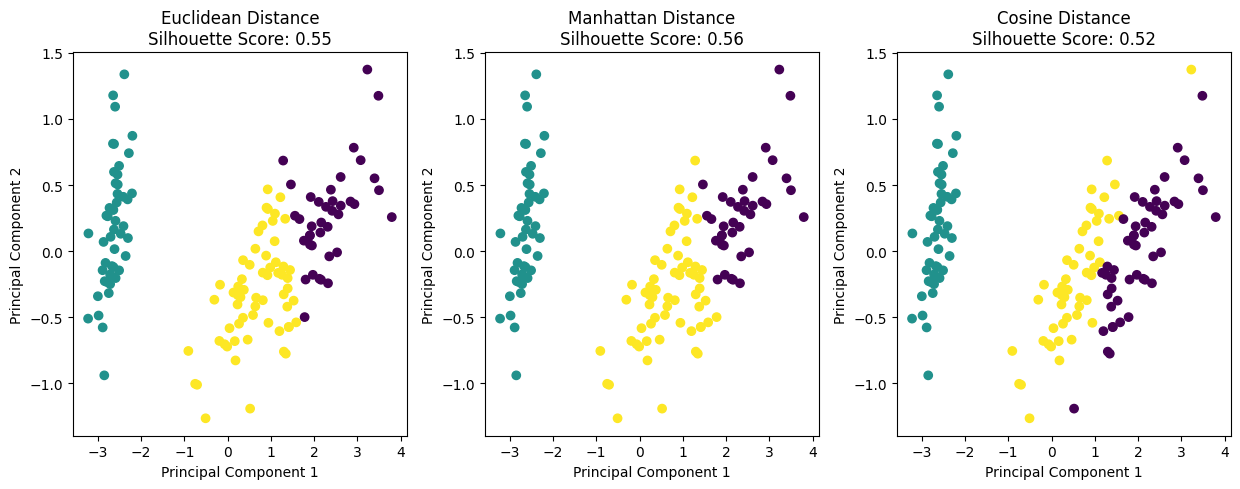

In [15]:
import matplotlib.pyplot as plt

# Visualize the clustering results with silhouette score
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.argmin(euclidean_dist, axis=1), cmap='viridis')
plt.title('Euclidean Distance\nSilhouette Score: {:.2f}'.format(silhouette_avg_euclidean))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 4, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.argmin(manhattan_dist, axis=1), cmap='viridis')
plt.title('Manhattan Distance\nSilhouette Score: {:.2f}'.format(silhouette_avg_manhattan))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 4, 4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.argmin(cosine_dist, axis=1), cmap='viridis')
plt.title('Cosine Distance\nSilhouette Score: {:.2f}'.format(silhouette_avg_cosine))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Analysis of Inter-Data Distance

Below is the explanation of the analysis of inter-data distance shown in the figures:

## Figure 1: Scatter plot showing the relationship between Euclidean distance and principal component 1.

- **Silhouette Score**: 0.55
- The silhouette score evaluates the quality of clustering results. A score closer to 1 indicates well-separated clusters.
- The clustering based on Euclidean distance yields a silhouette score of 0.55, suggesting moderate clustering quality.
- However, the scatter plot shows a random scatter of data points without a clear pattern, indicating weak correlation between Euclidean distance and principal component 1.

## Figure 2: Scatter plot showing the relationship between Manhattan distance and principal component 1.

- **Silhouette Score**: 0.56
- The silhouette score for clustering based on Manhattan distance is 0.56, slightly higher than that of Euclidean distance.
- The scatter plot exhibits a slightly more directional scatter of data points, indicating a somewhat stronger correlation between Manhattan distance and principal component 1 compared to Euclidean distance.

## Figure 3: Scatter plot showing the relationship between Cosine distance and principal component 1.

- **Silhouette Score**: 0.52
- The silhouette score for clustering based on Cosine distance is 0.52, indicating moderate clustering quality.
- Similar to Euclidean distance, the scatter plot for Cosine distance shows a random scatter of data points without a clear pattern, suggesting weak correlation with principal component 1.

## Conclusion:

- While the silhouette scores provide insights into the clustering quality, the scatter plots illustrate the relationship between distance metrics and principal component 1.
- The analysis suggests that while Manhattan distance shows slightly better clustering quality compared to Euclidean and Cosine distances, all three metrics exhibit only moderate clustering quality.
- Considering both the silhouette scores and scatter plots, Manhattan distance appears to be the most suitable metric among the three for clustering this dataset, as it shows a slightly stronger correlation with principal component 1 and yields slightly higher silhouette score. However, further analysis and experimentation may be necessary to determine the most appropriate distance metric for the specific clustering task.
